In [71]:
# uses Pokeapi to get information about a Pokemon
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
from scipy.stats import bernoulli, binom, norm
from scipy.stats import chi2_contingency # chi-sqaured
from scipy.stats import pearsonr # pearson correlation
from scipy.stats import spearmanr # spearman correlation
import pandas as pd
import numpy as np

baseURL = "https://pokeapi.co/api/v2/"
wikiURL_gen1 = 'https://en.wikipedia.org/wiki/List_of_generation_I_Pok%C3%A9mon'
wikiURL_gen2 = 'https://en.wikipedia.org/wiki/List_of_generation_II_Pok%C3%A9mon'
wikiURL_gen3 = 'https://en.wikipedia.org/wiki/List_of_generation_III_Pok%C3%A9mon'
wikiURL_gen4 = 'https://en.wikipedia.org/wiki/List_of_generation_IV_Pok%C3%A9mon'
wikiURL_gen5 = 'https://en.wikipedia.org/wiki/List_of_generation_V_Pok%C3%A9mon'
wikiURL_gen6 = 'https://en.wikipedia.org/wiki/List_of_generation_VI_Pok%C3%A9mon'
wikiURL_gen7 = 'https://en.wikipedia.org/wiki/List_of_generation_VII_Pok%C3%A9mon'
wikiURL_gen8 = 'https://en.wikipedia.org/wiki/List_of_generation_VIII_Pok%C3%A9mon'
wikiURL_gen9 = 'https://en.wikipedia.org/wiki/List_of_generation_IX_Pok%C3%A9mon'

type_list = ['normal', 'fire', 'water', 'electric', 'grass', 'ice', 'fighting', 'poison', 'ground', 'flying', 'psychic', 'bug', 'rock', 'ghost', 'dragon', 'dark', 'steel', 'fairy']
stats_list = ['HP', 'attack', 'defense', 'special-attack', 'special-defense', 'speed']


'\nProject question ideas:\n- which pokemon type has the highest average base stats?\n- which pokemon type has the highest ___ stat on average?\n- which pokemen type is the most common?\n- plot the frequency of each type of pokemon by generation\n'

In [72]:
def get_all_pkm_info(name):
    url = f"{baseURL}pokemon/{name}"
    response = requests.get(url)
    return response.json()

In [73]:
print(f'Name: {get_all_pkm_info("pikachu")["name"]}')
print(f'ID: {get_all_pkm_info("pikachu")["id"]}')
print(f'Height: {get_all_pkm_info("pikachu")["height"]}')
print(f'Weight: {get_all_pkm_info("pikachu")["weight"]}')

Name: pikachu
ID: 25
Height: 4
Weight: 60


In [74]:
# retrieve base stats of a pokemon
# 0 = hp, 1 = attack, 2 = defense, 3 = special-attack, 4 = special-defense, 5 = speed
pikaHP = get_all_pkm_info("pikachu")["stats"][0]['base_stat']
print(f'HP: {pikaHP}')

HP: 35


In [75]:
# change the number to get other generations
page = requests.get(wikiURL_gen1)

In [76]:
# make soup
soup = BeautifulSoup(page.content, 'html.parser')
soup.prettify()

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">\n <head>\n  <meta charset="utf-8"/>\n  <title>\n   List of generation I Pokémon - Wikipedia\n  </title>\n  <script>\n   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-fe

In [77]:
# find the tag <div class="hlist">
hlist = soup.find_all('div', class_='hlist')[1]

# find all the <a> tags in the <div class="hlist">
names = hlist.find_all('a')
print(names[0])

<a href="#Bulbasaur">Bulbasaur</a>


In [78]:
#clean the names
clean_names = []
for name in names:
    clean_names.append(name.get_text().lower())
#fix improper names scraped from list to work with the API
clean_names.remove('nidoran♀')
clean_names.remove('nidoran♂')
clean_names.remove('farfetch\'d')
clean_names.remove('mr. mime')
clean_names.remove('missingno.')
clean_names.append('farfetchd')
clean_names.append('nidoran-f')
clean_names.append('nidoran-m')
print(clean_names)

['bulbasaur', 'ivysaur', 'venusaur', 'charmander', 'charmeleon', 'charizard', 'squirtle', 'wartortle', 'blastoise', 'caterpie', 'metapod', 'butterfree', 'weedle', 'kakuna', 'beedrill', 'pidgey', 'pidgeotto', 'pidgeot', 'rattata', 'raticate', 'spearow', 'fearow', 'ekans', 'arbok', 'pikachu', 'raichu', 'sandshrew', 'sandslash', 'nidorina', 'nidoqueen', 'nidorino', 'nidoking', 'clefairy', 'clefable', 'vulpix', 'ninetales', 'jigglypuff', 'wigglytuff', 'zubat', 'golbat', 'oddish', 'gloom', 'vileplume', 'paras', 'parasect', 'venonat', 'venomoth', 'diglett', 'dugtrio', 'meowth', 'persian', 'psyduck', 'golduck', 'mankey', 'primeape', 'growlithe', 'arcanine', 'poliwag', 'poliwhirl', 'poliwrath', 'abra', 'kadabra', 'alakazam', 'machop', 'machoke', 'machamp', 'bellsprout', 'weepinbell', 'victreebel', 'tentacool', 'tentacruel', 'geodude', 'graveler', 'golem', 'ponyta', 'rapidash', 'slowpoke', 'slowbro', 'magnemite', 'magneton', 'doduo', 'dodrio', 'seel', 'dewgong', 'grimer', 'muk', 'shellder', 'cl

In [79]:
# get the base HP of all gen 1 pokemon and add it to a dataframe
gen1_pokemon = pd.DataFrame(columns=['name', 'type', 'HP', 'attack', 'defense', 'special-attack', 'special-defense', 'speed'])

# for name in clean_names add a row to the dataframe
for name in clean_names:
    try:
        pkm_info = get_all_pkm_info(name)
        pkm_stats = []
        pkm_stats.append(name)
        pkm_stats.append(pkm_info["types"][0]["type"]["name"])
        pkm_stats.append(pkm_info["stats"][0]["base_stat"])
        pkm_stats.append(pkm_info["stats"][1]["base_stat"])
        pkm_stats.append(pkm_info["stats"][2]["base_stat"])
        pkm_stats.append(pkm_info["stats"][3]["base_stat"])
        pkm_stats.append(pkm_info["stats"][4]["base_stat"])
        pkm_stats.append(pkm_info["stats"][5]["base_stat"])
        gen1_pokemon.loc[len(gen1_pokemon)] = pkm_stats
    except:
        print(f"missing {name}")

In [80]:
# add a column of total stats
gen1_pokemon['total'] = gen1_pokemon['HP'] + gen1_pokemon['attack'] + gen1_pokemon['defense'] + gen1_pokemon['special-attack'] + gen1_pokemon['special-defense'] + gen1_pokemon['speed']

In [92]:
gen1_pokemon.shape

(150, 10)

In [81]:
gen1_pokemon.head()

,name,type,HP,attack,defense,special-attack,special-defense,speed,total
0,bulbasaur,grass,45,49,49,65,65,45,318
1,ivysaur,grass,60,62,63,80,80,60,405
2,venusaur,grass,80,82,83,100,100,80,525
3,charmander,fire,39,52,43,60,50,65,309
4,charmeleon,fire,58,64,58,80,65,80,405


In [82]:
gen1_pokemon.tail()

,name,type,HP,attack,defense,special-attack,special-defense,speed,total
145,mewtwo,psychic,106,110,90,154,90,130,680
146,mew,psychic,100,100,100,100,100,100,600
147,farfetchd,normal,52,90,55,58,62,60,377
148,nidoran-f,poison,55,47,52,40,40,41,275
149,nidoran-m,poison,46,57,40,40,40,50,273


In [83]:
#get avg stats for each type
def get_type_avg(type):
    avg_list = []
    avg_list.append(type)
    avg_list.append(gen1_pokemon[gen1_pokemon['type'] == type]['HP'].mean())
    avg_list.append(gen1_pokemon[gen1_pokemon['type'] == type]['attack'].mean())
    avg_list.append(gen1_pokemon[gen1_pokemon['type'] == type]['defense'].mean())
    avg_list.append(gen1_pokemon[gen1_pokemon['type'] == type]['special-attack'].mean())
    avg_list.append(gen1_pokemon[gen1_pokemon['type'] == type]['special-defense'].mean())
    avg_list.append(gen1_pokemon[gen1_pokemon['type'] == type]['speed'].mean())
    avg_list.append(gen1_pokemon[gen1_pokemon['type'] == type]['total'].mean())
    avg_list.append(gen1_pokemon[gen1_pokemon['type'] == type]['total'].count())
    return avg_list

In [84]:
typedf = pd.DataFrame(columns=['type', 'HP', 'attack', 'defense', 'special-attack', 'special-defense', 'speed', 'total', 'count'])
for type in type_list:
    typedf.loc[len(typedf)] = get_type_avg(type)
typedf

,type,HP,attack,defense,special-attack,special-defense,speed,total,count
0,normal,78.681818,68.863636,53.545455,51.272727,59.863636,69.772727,382.000000,22
1,fire,63.833333,83.916667,62.583333,84.583333,76.666667,84.000000,455.583333,12
2,water,64.535714,70.250000,77.500000,64.821429,66.392857,67.714286,411.214286,28
3,electric,54.444444,62.000000,64.666667,91.111111,73.333333,100.000000,445.555556,9
4,grass,65.000000,70.666667,69.583333,87.916667,65.000000,52.083333,410.250000,12
5,ice,77.500000,67.500000,67.500000,105.000000,110.000000,90.000000,517.500000,2
6,fighting,63.571429,102.857143,61.000000,45.000000,73.571429,66.142857,412.142857,7
7,poison,64.500000,75.142857,67.000000,57.142857,61.642857,58.785714,384.214286,14
8,ground,58.125000,84.375000,86.250000,39.375000,50.625000,58.125000,376.875000,8
9,flying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


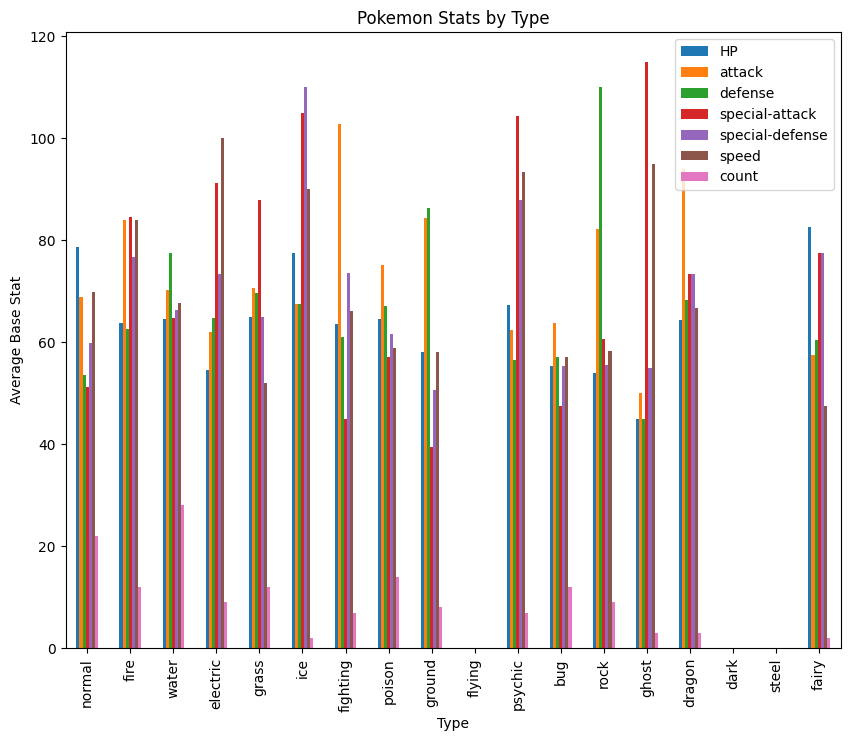

In [85]:
# create a bar graph of the average stats of each type except for total
graph = typedf.plot(x='type', y=['HP', 'attack', 'defense', 'special-attack', 'special-defense', 'speed', 'count'], kind='bar', figsize=(10, 8))
graph.set_title('Pokemon Stats by Type')
graph.set_xlabel('Type')
graph.set_ylabel('Average Base Stat')
plt.show()

In [86]:
max_count = typedf[typedf['count'] == typedf['count'].max()]['type']
max_total = typedf[typedf['total'] == typedf['total'].max()]['type']
max_HP = typedf[typedf['HP'] == typedf['HP'].max()]['type']
max_attack = typedf[typedf['attack'] == typedf['attack'].max()]['type']
max_defense = typedf[typedf['defense'] == typedf['defense'].max()]['type']
max_special_attack = typedf[typedf['special-attack'] == typedf['special-attack'].max()]['type']
max_special_defense = typedf[typedf['special-defense'] == typedf['special-defense'].max()]['type']
max_speed = typedf[typedf['speed'] == typedf['speed'].max()]['type']

print(f'most common: {max_count.values[0]}')
print(f'highest avg stats: {max_total.values[0]}')
print(f'highest avg HP: {max_HP.values[0]}')
print(f'highest avg attack: {max_attack.values[0]}')
print(f'highest avg defense: {max_defense.values[0]}')
print(f'highest avg special attack: {max_special_attack.values[0]}')
print(f'highest avg special defense: {max_special_defense.values[0]}')
print(f'highest avg speed: {max_speed.values[0]}')

most common: water
highest avg stats: ice
highest avg HP: fairy
highest avg attack: fighting
highest avg defense: rock
highest avg special attack: ghost
highest avg special defense: ice
highest avg speed: electric


stat=0.851, p=0.000
HP is not normally distributed


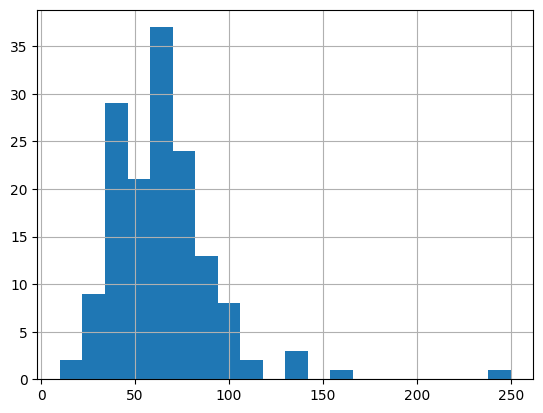

In [87]:
# check for normal distribution of HP
gen1_pokemon['HP'].hist(bins=20)
stat, p = sc.stats.shapiro(gen1_pokemon['HP'])
print(f'stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('HP is normally distributed')
else:
    print('HP is not normally distributed')

In [88]:
# categorical correlation test to see which type is associated with the highest HP

# TRY WITH OTHER STATS BUT MAY NOT FIND ANYTHING SIGNIFICANT

# create categories for HP
gen1_pokemon['HPcategory'] = pd.cut(gen1_pokemon['HP'], bins=[0, 50, 100, 150, 200], labels=['0-50', '51-100', '101-150', '151-200'])

contingency_table = pd.crosstab(gen1_pokemon['type'], gen1_pokemon['HPcategory'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'chi2={chi2}, p={p}')

chi2=23.486437173937173, p=0.9906838982880104


In [115]:
# pearson correlation tests

correlated_stats_pearson = []
correlated_stats_pearson_p = []

for stat_1 in stats_list:
    for stat_2 in stats_list:
        if stat_1 != stat_2:
            stat, p = pearsonr(gen1_pokemon[stat_1], gen1_pokemon[stat_2])
            #print(f'{stat_1} and {stat_2}: stat={stat}, p={p}')
            if p < 0.005:
                correlated_stats_pearson.append((stat_1, stat_2))
                correlated_stats_pearson_p.append((stat_1, stat_2, p))

lowest_p = 1
for stat in stats_list:
    for i in range(len(correlated_stats_pearson_p)):
        if correlated_stats_pearson_p[i][0] == stat:
            if correlated_stats_pearson_p[i][2] < lowest_p:
                lowest_p = correlated_stats_pearson_p[i][2]
                lowest_p_stat = correlated_stats_pearson_p[i][1]
    print(f'{stat} is highest correlated with {lowest_p_stat}. p={lowest_p}')

HP is highest correlated with special-defense. p=1.3606599251643136e-11
attack is highest correlated with special-defense. p=1.3606599251643136e-11
defense is highest correlated with special-defense. p=1.3606599251643136e-11
special-attack is highest correlated with special-defense. p=7.291808562404079e-12
special-defense is highest correlated with special-defense. p=7.291808562404079e-12
speed is highest correlated with special-defense. p=7.291808562404079e-12


In [116]:
# spearman correlation
correlated_stats_spear = []
correlated_stats_spear_p = []

for stat_1 in stats_list:
    for stat_2 in stats_list:
        if stat_1 != stat_2:
            stat, p = spearmanr(gen1_pokemon[stat_1], gen1_pokemon[stat_2])
            #print(f'{stat_1} and {stat_2}: stat={stat}, p={p}')
            if p < 0.005:
                correlated_stats_spear.append((stat_1, stat_2))
                correlated_stats_spear_p.append((stat_1, stat_2, p))

lowest_p = 1
for stat in stats_list:
    for i in range(len(correlated_stats_spear_p)):
        if correlated_stats_spear_p[i][0] == stat:
            if correlated_stats_spear_p[i][2] < lowest_p:
                lowest_p = correlated_stats_spear_p[i][2]
                lowest_p_stat = correlated_stats_spear_p[i][1]
    print(f'{stat} is highest correlated with {lowest_p_stat}. p={lowest_p}')

# *results indicate that special-defense is a predictor of all other stats*

HP is highest correlated with special-defense. p=1.4713234036283626e-15
attack is highest correlated with special-defense. p=1.4713234036283626e-15
defense is highest correlated with special-defense. p=1.4713234036283626e-15
special-attack is highest correlated with special-defense. p=1.4713234036283626e-15
special-defense is highest correlated with special-defense. p=1.4713234036283626e-15
speed is highest correlated with special-defense. p=1.4713234036283626e-15


In [96]:
# overlap between pearson and spearman correlations
overlap = []
for stat in correlated_stats_pearson:
    if stat in correlated_stats_spear:
        overlap.append(stat)

overlap

[]